In [5]:
# load issues, limit to weighted
import json
import urllib.request

data = urllib.request.urlopen("https://gitlab.com/api/v4/projects/mbruemmer%2Fissue-value-vs-cost-matrix-prototype/repository/files/best_issues.json/raw?ref=master")
issues = json.load(data)

weighted = []
for issue in issues:
    if issue["weight"] is not None:
        weighted.append(issue)

In [6]:
# define individual traces for each milestone category to be able to filter them from plotly
backlog = []
next_milestone = []
awaiting = []
r12_8 = []
r12_9 = []
r13 = []
no_milestone = []
for issue in weighted:
    if issue["milestone"] is not None:
        if issue["milestone"]["title"] == "Backlog":  
            backlog.append([issue["weight"], issue["upvotes"], issue["title"], "red" ])
        elif "Next" in issue["milestone"]["title"]:
            next_milestone.append([issue["weight"], issue["upvotes"], issue["title"], "gold" ])
        elif "Awaiting" in issue["milestone"]["title"]:
            awaiting.append([issue["weight"], issue["upvotes"], issue["title"], "firebrick" ])
        elif "12.8" in issue["milestone"]["title"]:
            r12_8.append([issue["weight"], issue["upvotes"], issue["title"], "forestgreen" ])
        elif "12.9" in issue["milestone"]["title"]:
            r12_9.append([issue["weight"], issue["upvotes"], issue["title"], "palegreen" ])
        elif "13" in issue["milestone"]["title"]:
            r13.append([issue["weight"], issue["upvotes"], issue["title"], "yellow" ])
    else:
        no_milestone.append([issue["weight"], issue["upvotes"], issue["title"], "black" ])

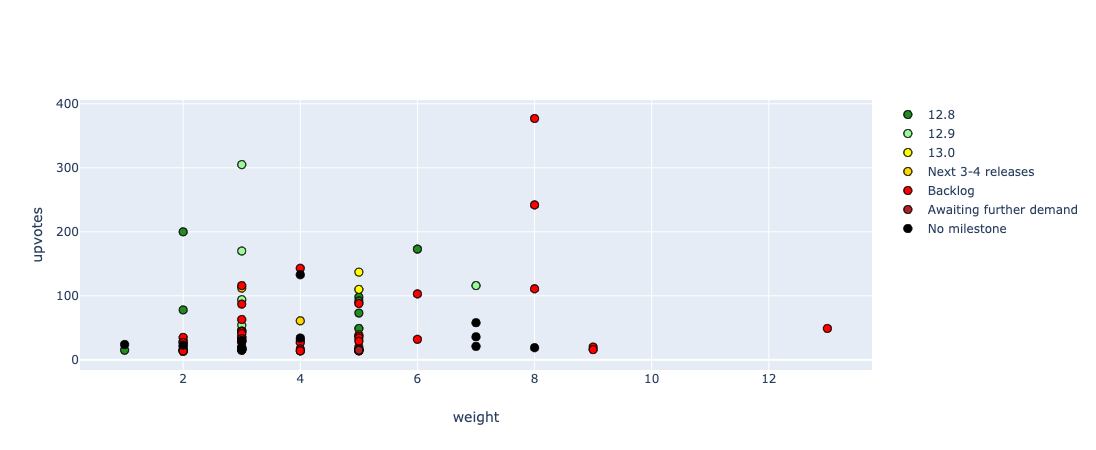

In [7]:
import plotly.graph_objects as go

plot_annotations = []

# add annotations as clickable links on top of the markers, use issue title as hover text
for issue in weighted:
    milestone = "None"
    if issue["milestone"] is not None:
        milestone = issue["milestone"]["title"]

    plot_annotations.append(dict(x=issue["weight"],
                    y=issue["upvotes"],
                    text='<a href="' + issue["web_url"] + '"> </a>',
                    showarrow=False,
                    xanchor='center',
                    yanchor='middle',
                    hovertext=issue["title"]
                    ))

# create figure and add traces
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in r12_8],
    y=[dot[1] for dot in r12_8],
    marker = dict(size=8, color=[dot[3] for dot in r12_8], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="12.8"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in r12_9],
    y=[dot[1] for dot in r12_9],
    marker = dict(size=8, color=[dot[3] for dot in r12_9], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="12.9"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in r13],
    y=[dot[1] for dot in r13],
    marker = dict(size=8, color=[dot[3] for dot in r13], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="13.0"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in next_milestone],
    y=[dot[1] for dot in next_milestone],
    marker = dict(size=8, color=[dot[3] for dot in next_milestone], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="Next 3-4 releases"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in backlog],
    y=[dot[1] for dot in backlog],
    marker = dict(size=8, color=[dot[3] for dot in backlog], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="Backlog"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in awaiting],
    y=[dot[1] for dot in awaiting],
    marker = dict(size=8, color=[dot[3] for dot in awaiting], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="Awaiting further demand"
))

fig.add_trace(go.Scatter(
    x=[dot[0] for dot in no_milestone],
    y=[dot[1] for dot in no_milestone],
    marker = dict(size=8, color=[dot[3] for dot in no_milestone], line=dict(color='black',width=1)),
    hoverinfo="none",
    mode='markers',
    name="No milestone"
))



fig.update_layout(
    showlegend=True,
    xaxis_title="weight",
    yaxis_title="upvotes",
    annotations=plot_annotations
)
fig.show()